In [413]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [414]:
df_train=pd.read_csv('train.csv', index_col=0)
df_test=pd.read_csv('test.csv',index_col=0)
y_train=df_train['Survived']

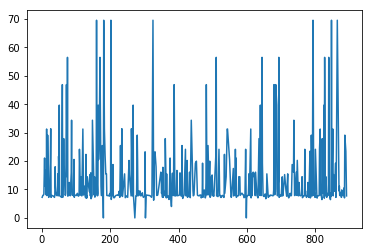

In [415]:
plt.plot(df_train.Fare[df_train['Pclass']==3])

In [416]:
from scipy.stats import mstats
from scipy.stats import boxcox
from sklearn.preprocessing import scale

In [417]:
transformed_train_data_1 =pd.Series(mstats.winsorize(df_train.Fare[df_train['Pclass']==1], limits=[0.05, 0.05])) 
transformed_train_data_2 =pd.Series(mstats.winsorize(df_train.Fare[df_train['Pclass']==2], limits=[0.05, 0.05])) 
transformed_train_data_3 =pd.Series(mstats.winsorize(df_train.Fare[df_train['Pclass']==3], limits=[0.05, 0.05])) 

In [418]:
df_train.loc[df_train['Pclass']==1,'Fare']=transformed_train_data_1.values
df_train.loc[df_train['Pclass']==2,'Fare']=transformed_train_data_2.values
df_train.loc[df_train['Pclass']==3,'Fare']=transformed_train_data_3.values

In [419]:
transformed_test_data_1 =pd.Series(mstats.winsorize(df_test.Fare[df_test['Pclass']==1], limits=[0.05, 0.05])) 
transformed_test_data_2 =pd.Series(mstats.winsorize(df_test.Fare[df_test['Pclass']==2], limits=[0.05, 0.05])) 
transformed_test_data_3 =pd.Series(mstats.winsorize(df_test.Fare[df_test['Pclass']==3], limits=[0.05, 0.05])) 

In [420]:
df_test.loc[df_test['Pclass']==1,'Fare']=transformed_test_data_1.values
df_test.loc[df_test['Pclass']==2,'Fare']=transformed_test_data_2.values
df_test.loc[df_test['Pclass']==3,'Fare']=transformed_test_data_3.values

In [421]:
df_train.Embarked.fillna('S', inplace=True)

In [422]:
df_test['has_Cabin']=df_test.Cabin.notnull().astype(int)
df_train['has_Cabin']=df_train.Cabin.notnull().astype(int)

In [423]:
df_train['Cabin']=df_train.Cabin.str.split()
df_train['N_Cabin_1']=(df_train.Cabin.str.len()==1).astype(int)
df_train['N_Cabin_2']=(df_train.Cabin.str.len()==2).astype(int)
df_train['N_Cabin_3']=(df_train.Cabin.str.len()==3).astype(int)
df_train['N_Cabin_4']=(df_train.Cabin.str.len()==4).astype(int)

In [424]:
df_test['Cabin']=df_test.Cabin.str.split()
df_test['N_Cabin_1']=(df_test.Cabin.str.len()==1).astype(int)
df_test['N_Cabin_2']=(df_test.Cabin.str.len()==2).astype(int)
df_test['N_Cabin_3']=(df_test.Cabin.str.len()==3).astype(int)
df_test['N_Cabin_4']=(df_test.Cabin.str.len()==4).astype(int)

In [425]:
df_train['Name_20']=((df_train.Name.str.len()<=20)).astype(int)
df_train['Name_2030']=((df_train.Name.str.len()>20) & (df_train.Name.str.len()<=30)).astype(int)
df_train['Name_3040']=((df_train.Name.str.len()>30) & (df_train.Name.str.len()<=40)).astype(int)
df_train['Name_40']=((df_train.Name.str.len()>40)).astype(int)

In [426]:
df_test['Name_20']=((df_test.Name.str.len()<=20)).astype(int)
df_test['Name_2030']=((df_test.Name.str.len()>20) & (df_test.Name.str.len()<=30)).astype(int)
df_test['Name_3040']=((df_test.Name.str.len()>30) & (df_test.Name.str.len()<=40)).astype(int)
df_test['Name_40']=((df_test.Name.str.len()>40)).astype(int)

In [427]:
df_train['is_Miss']=df_train.Name.str.contains('Miss').astype(int)
df_train['is_Master']=df_train.Name.str.contains('Master').astype(int)
df_train['is_Mr']=df_train.Name.str.contains(r'(?:\s|^)Mr.(?:\s|$)').astype(int)
df_train['is_Mrs']=df_train.Name.str.contains(r'(?:\s|^)Mrs.(?:\s|$)').astype(int)
df_train['Rare']=((df_train.is_Miss!=1)&(df_train.is_Master!=1)&(df_train.is_Mr!=1)&(df_train.is_Mrs!=1)).astype(int)

In [428]:
df_test['is_Miss']=df_test.Name.str.contains('Miss').astype(int)
df_test['is_Master']=df_test.Name.str.contains('Master').astype(int)
df_test['is_Mr']=df_test.Name.str.contains(r'(?:\s|^)Mr.(?:\s|$)').astype(int)
df_test['is_Mrs']=df_test.Name.str.contains(r'(?:\s|^)Mrs.(?:\s|$)').astype(int)
df_test['Rare']=((df_test.is_Miss!=1)&(df_test.is_Master!=1)&(df_test.is_Mr!=1)&(df_test.is_Mrs!=1)).astype(int)

In [429]:
for index, row in df_train.iterrows():
    if (np.isnan(row['Age'])):
        if row['is_Master']==1:
            df_train.loc[index, 'Age']=4
        elif row['is_Miss']==1:
            df_train.loc[index,'Age']=(df_train.Age[df_train['is_Miss']==1]).median()
        elif row['is_Mr']==1:
            df_train.loc[index,'Age']=(df_train.Age[df_train['is_Mr']==1]).median()
        elif row['is_Mrs']==1:
            df_train.loc[index,'Age']=(df_train.Age[df_train['is_Mrs']==1]).median()

In [430]:
for index, row in df_test.iterrows():
    if (np.isnan(row['Age'])):
        if row['is_Master']==1:
            df_test.loc[index, 'Age']=4
        elif row['is_Miss']==1:
            df_test.loc[index,'Age']=(df_test.Age[df_test['is_Miss']==1]).median()
        elif row['is_Mr']==1:
            df_test.loc[index,'Age']=(df_test.Age[df_test['is_Mr']==1]).median()
        elif row['is_Mrs']==1:
            df_test.loc[index,'Age']=(df_test.Age[df_test['is_Mrs']==1]).median()

In [431]:
df_train.fillna(df_train.median(), inplace=True);
df_test.fillna(df_test.median(), inplace=True);

In [432]:
for index, row in df_train.iterrows():
    if row['Age']<=20:
        df_train.loc[index,'Age']='0-20'
    elif 20<row['Age']<=30:
        df_train.loc[index,'Age']='20-30'
    elif 30<row['Age']<=40:
        df_train.loc[index,'Age']='30-40'
    elif 40<row['Age']<=50:
        df_train.loc[index,'Age']='40-50'
    elif 50<row['Age']<=60:
        df_train.loc[index,'Age']='50-60'
    elif row['Age']>60:
        df_train.loc[index,'Age']='60+'

In [433]:
for index, row in df_test.iterrows():
    if row['Age']<=20:
        df_test.loc[index,'Age']='0-20'
    elif 20<row['Age']<=30:
        df_test.loc[index,'Age']='20-30'
    elif 30<row['Age']<=40:
        df_test.loc[index,'Age']='30-40'
    elif 40<row['Age']<=50:
        df_test.loc[index,'Age']='40-50'
    elif 50<row['Age']<=60:
        df_test.loc[index,'Age']='50-60'
    elif row['Age']>60:
        df_test.loc[index,'Age']='60+'

In [434]:
'''
for index, row in df_train.iterrows():
    if row['Fare']<=25:
        df_train.loc[index, 'Fare']='0-25'
    elif 25<row['Fare']<=50:
        df_train.loc[index, 'Fare']='25-50'
    elif 50<row['Fare']<=100:
        df_train.loc[index, 'Fare']='50-100'
    elif 100<row['Fare']<=200:
        df_train.loc[index, 'Fare']='100-200'
    elif 200<row['Fare']<=300:
        df_train.loc[index, 'Fare']='200-600'
    elif 300<row['Fare']<=600:
        df_train.loc[index, 'Fare']='300-600'
'''

"\nfor index, row in df_train.iterrows():\n    if row['Fare']<=25:\n        df_train.loc[index, 'Fare']='0-25'\n    elif 25<row['Fare']<=50:\n        df_train.loc[index, 'Fare']='25-50'\n    elif 50<row['Fare']<=100:\n        df_train.loc[index, 'Fare']='50-100'\n    elif 100<row['Fare']<=200:\n        df_train.loc[index, 'Fare']='100-200'\n    elif 200<row['Fare']<=300:\n        df_train.loc[index, 'Fare']='200-600'\n    elif 300<row['Fare']<=600:\n        df_train.loc[index, 'Fare']='300-600'\n"

In [435]:
'''
for index, row in df_test.iterrows():
    if row['Fare']<=25:
        df_test.loc[index, 'Fare']='0-25'
    elif 25<row['Fare']<=50:
        df_test.loc[index, 'Fare']='25-50'
    elif 50<row['Fare']<=100:
        df_test.loc[index, 'Fare']='50-100'
    elif 100<row['Fare']<=200:
        df_test.loc[index, 'Fare']='100-200'
    elif 200<row['Fare']<=300:
        df_test.loc[index, 'Fare']='200-600'
    elif 300<row['Fare']<=600:
        df_test.loc[index, 'Fare']='300-600'
'''        

"\nfor index, row in df_test.iterrows():\n    if row['Fare']<=25:\n        df_test.loc[index, 'Fare']='0-25'\n    elif 25<row['Fare']<=50:\n        df_test.loc[index, 'Fare']='25-50'\n    elif 50<row['Fare']<=100:\n        df_test.loc[index, 'Fare']='50-100'\n    elif 100<row['Fare']<=200:\n        df_test.loc[index, 'Fare']='100-200'\n    elif 200<row['Fare']<=300:\n        df_test.loc[index, 'Fare']='200-600'\n    elif 300<row['Fare']<=600:\n        df_test.loc[index, 'Fare']='300-600'\n"

In [436]:
#tickets_train=df_train.Ticket.value_counts().to_dict()
#tickets_test=df_test.Ticket.value_counts().to_dict()

In [437]:
names_train=df_train.Name.str.split(',').str.get(0).value_counts().to_dict()
names_test=df_test.Name.str.split(',').str.get(0).value_counts().to_dict()

In [438]:
df_train['small_Family']=0
df_train['middle_Family']=0
df_train['big_Family']=0
for index, row in df_train.iterrows():
    name=row['Name'].split(',')[0]
    if names_train[name]<=3:
        df_train.loc[index, 'small_Family']=1
    elif names_train[name]<=5:
        df_train.loc[index, 'middle_Family']=1
    elif names_train[name]>5:
        df_train.loc[index, 'big_Family']=1

In [439]:
df_test['small_Family']=0
df_test['middle_Family']=0
df_test['big_Family']=0
for index, row in df_test.iterrows():
    name=row['Name'].split(',')[0]
    if names_test[name]<=3:
        df_test.loc[index, 'small_Family']=1
    elif names_test[name]<=5:
        df_test.loc[index, 'middle_Family']=1
    elif names_test[name]>5:
        df_test.loc[index, 'big_Family']=1

In [440]:
import re
df_train['Left']=0
df_train['Right']=0
for index, row in df_train.iterrows():
    cabine=re.sub('[^0-9]+','',str(row['Cabin']).split(' ')[0])
    if(len(cabine)>0 and int(cabine)%2==0):
        df_train.loc[index,'Left']=1
    elif(len(cabine)>0):
        df_train.loc[index,'Right']=1

In [441]:
import re
df_test['Left']=0
df_test['Right']=0
for index, row in df_test.iterrows():
    cabine=re.sub('[^0-9]+','',str(row['Cabin']).split(' ')[0])
    if(len(cabine)>0 and int(cabine)%2==0):
        df_test.loc[index,'Left']=1
    elif(len(cabine)>0):
        df_test.loc[index,'Right']=1

In [442]:
df_train=df_train.drop(['Name','Ticket', 'Survived', 'Cabin'], axis=1)
df_test=df_test.drop(['Name','Ticket','Cabin'], axis=1)

In [443]:
X_train=pd.get_dummies(df_train)
X_test=pd.get_dummies(df_test)

In [444]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [445]:
ones_ratio=y_train[y_train==1].shape[0]*1.0/y_train[y_train==0].shape[0]

param_grid = {
    # параметры ансамбля
    'n_estimators': [10, 30, 50, 100, 200, 400, 600, 1000],
    'learning_rate': [0.1],
    
    # параметры дерева
    'max_depth': [5],
    'min_child_weight': [2],
    'gamma': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [ones_ratio],
    
    # параметры регуляризации
    'reg_alpha': [0.0],
    'reg_lambda': [1.0]
}

cv = KFold(n_splits=4, shuffle=True)

clf = XGBClassifier()
gs = GridSearchCV(clf, param_grid, scoring='accuracy', cv=cv, verbose=5)

gs.fit(X_train, y_train)
best_params = gs.best_estimator_.get_params()
print('Best score (ACC): ', gs.best_score_)
print('Best params: ')
best_params

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=10, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=10, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8, score=0.843049, total=   0.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=10, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=10, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8, score=0.789238, total=   0.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=10, reg_alpha=0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8, score=0.838565, total=   0.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8, score=0.816143, total=   0.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, su

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1000, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8, score=0.834081, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1000, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1000, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8, score=0.807175, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1000, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196721312, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1000, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=0.6229508196

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    5.2s finished


{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 30,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'scale_pos_weight': 0.6229508196721312,
 'seed': 0,
 'silent': True,
 'subsample': 0.8}

In [446]:
param_grid = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}

clf = XGBClassifier(**best_params) # в качестве отправной точки возьмём модель с наилучшими параметрами предыдущего шага

gs = GridSearchCV(clf, param_grid, scoring='accuracy', cv=cv, verbose=5)

gs.fit(X_train, y_train)
best_params = gs.best_estimator_.get_params()
print('Best score (ACC): ', gs.best_score_)
print('Best params: ')
best_params

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .. max_depth=3, min_child_weight=1, score=0.811659, total=   0.2s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .. max_depth=3, min_child_weight=1, score=0.807175, total=   0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .. max_depth=3, min_child_weight=1, score=0.798206, total=   0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .. max_depth=3, min_child_weight=1, score=0.792793, total=   0.0s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .. max_depth=3, min_child_weight=3, score=0.811659, total=   0.0s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .. max_depth=3, min_child_weight=3, score=0.816143, total=   0.0s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .. max_dept

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] .. max_depth=5, min_child_weight=1, score=0.802691, total=   0.0s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] .. max_depth=5, min_child_weight=1, score=0.802691, total=   0.0s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] .. max_depth=5, min_child_weight=1, score=0.806306, total=   0.0s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] .. max_depth=5, min_child_weight=3, score=0.838565, total=   0.0s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] .. max_depth=5, min_child_weight=3, score=0.811659, total=   0.0s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] .. max_depth=5, min_child_weight=3, score=0.811659, total=   0.0s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] .. max_depth=5, min_child_weight=3, score=0.815315, total=   0.0s
[CV] max_depth=5, min_child_weight=5 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.4s finished


{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 30,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'scale_pos_weight': 0.6229508196721312,
 'seed': 0,
 'silent': True,
 'subsample': 0.8}

In [447]:
param_grid = {
    'gamma': [0.1*i for i in range(6)]
}

clf = XGBClassifier(**best_params)

gs = GridSearchCV(clf, param_grid, scoring='accuracy', cv=cv, verbose=5)

gs.fit(X_train, y_train)
best_params = gs.best_estimator_.get_params()
print('Best score (ACC): ', gs.best_score_)
print('Best params: ')
best_params

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] gamma=0.0 .......................................................
[CV] ........................ gamma=0.0, score=0.834081, total=   0.2s
[CV] gamma=0.0 .......................................................
[CV] ........................ gamma=0.0, score=0.816143, total=   0.0s
[CV] gamma=0.0 .......................................................
[CV] ........................ gamma=0.0, score=0.834081, total=   0.0s
[CV] gamma=0.0 .......................................................
[CV] ........................ gamma=0.0, score=0.806306, total=   0.0s
[CV] gamma=0.1 .......................................................
[CV] ........................ gamma=0.1, score=0.834081, total=   0.0s
[CV] gamma=0.1 .......................................................
[CV] ........................ gamma=0.1, score=0.816143, total=   0.0s
[CV] gamma=0.1 .......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV] ........................ gamma=0.2, score=0.829596, total=   0.0s
[CV] gamma=0.2 .......................................................
[CV] ........................ gamma=0.2, score=0.797297, total=   0.0s
[CV] gamma=0.30000000000000004 .......................................
[CV] ........ gamma=0.30000000000000004, score=0.829596, total=   0.0s
[CV] gamma=0.30000000000000004 .......................................
[CV] ........ gamma=0.30000000000000004, score=0.816143, total=   0.0s
[CV] gamma=0.30000000000000004 .......................................
[CV] ........ gamma=0.30000000000000004, score=0.838565, total=   0.0s
[CV] gamma=0.30000000000000004 .......................................
[CV] ........ gamma=0.30000000000000004, score=0.801802, total=   0.0s
[CV] gamma=0.4 .......................................................
[CV] ........................ gamma=0.4, score=0.834081, total=   0.0s
[CV] gamma=0.4 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.8s finished


{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 30,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'scale_pos_weight': 0.6229508196721312,
 'seed': 0,
 'silent': True,
 'subsample': 0.8}

In [448]:
param_grid = {
    'subsample': [0.5 + 0.1*i for i in range(6)],
    'colsample_bytree': [0.5 + 0.1*i for i in range(6)]
}

clf = XGBClassifier(**best_params)

gs = GridSearchCV(clf, param_grid, scoring='accuracy', cv=cv, verbose=5)

gs.fit(X_train, y_train)
best_params = gs.best_estimator_.get_params()
print('Best score (ACC): ', gs.best_score_)
print('Best params: ')
best_params

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV]  colsample_bytree=0.5, subsample=0.5, score=0.820628, total=   0.2s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV]  colsample_bytree=0.5, subsample=0.5, score=0.780269, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV]  colsample_bytree=0.5, subsample=0.5, score=0.789238, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV]  colsample_bytree=0.5, subsample=0.5, score=0.810811, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV]  colsample_bytree=0.5, subsample=0.6, score=0.825112, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV]  colsample_bytree=0.5, subsample=0.6, score=0.775785, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s



[CV] colsample_bytree=0.5, subsample=0.7 .............................
[CV]  colsample_bytree=0.5, subsample=0.7, score=0.819820, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.8 .............................
[CV]  colsample_bytree=0.5, subsample=0.8, score=0.838565, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.8 .............................
[CV]  colsample_bytree=0.5, subsample=0.8, score=0.811659, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.8 .............................
[CV]  colsample_bytree=0.5, subsample=0.8, score=0.807175, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.8 .............................
[CV]  colsample_bytree=0.5, subsample=0.8, score=0.828829, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.9 .............................
[CV]  colsample_bytree=0.5, subsample=0.9, score=0.847534, total=   0.0s
[CV] colsample_bytree=0.5, subsample=0.9 .............................
[CV]  colsample_bytree=0.5, subsample=0.9, score=0.820628, total

[CV]  colsample_bytree=0.7, subsample=1.0, score=0.811659, total=   0.0s
[CV] colsample_bytree=0.7, subsample=1.0 .............................
[CV]  colsample_bytree=0.7, subsample=1.0, score=0.819820, total=   0.0s
[CV] colsample_bytree=0.8, subsample=0.5 .............................
[CV]  colsample_bytree=0.8, subsample=0.5, score=0.816143, total=   0.0s
[CV] colsample_bytree=0.8, subsample=0.5 .............................
[CV]  colsample_bytree=0.8, subsample=0.5, score=0.798206, total=   0.0s
[CV] colsample_bytree=0.8, subsample=0.5 .............................
[CV]  colsample_bytree=0.8, subsample=0.5, score=0.789238, total=   0.0s
[CV] colsample_bytree=0.8, subsample=0.5 .............................
[CV]  colsample_bytree=0.8, subsample=0.5, score=0.824324, total=   0.0s
[CV] colsample_bytree=0.8, subsample=0.6 .............................
[CV]  colsample_bytree=0.8, subsample=0.6, score=0.820628, total=   0.2s
[CV] colsample_bytree=0.8, subsample=0.6 ......................

[CV]  colsample_bytree=1.0, subsample=0.7, score=0.807175, total=   0.0s
[CV] colsample_bytree=1.0, subsample=0.7 .............................
[CV]  colsample_bytree=1.0, subsample=0.7, score=0.824324, total=   0.0s
[CV] colsample_bytree=1.0, subsample=0.8 .............................
[CV]  colsample_bytree=1.0, subsample=0.8, score=0.847534, total=   0.0s
[CV] colsample_bytree=1.0, subsample=0.8 .............................
[CV]  colsample_bytree=1.0, subsample=0.8, score=0.820628, total=   0.0s
[CV] colsample_bytree=1.0, subsample=0.8 .............................
[CV]  colsample_bytree=1.0, subsample=0.8, score=0.829596, total=   0.0s
[CV] colsample_bytree=1.0, subsample=0.8 .............................
[CV]  colsample_bytree=1.0, subsample=0.8, score=0.824324, total=   0.0s
[CV] colsample_bytree=1.0, subsample=0.9 .............................
[CV]  colsample_bytree=1.0, subsample=0.9, score=0.852018, total=   0.0s
[CV] colsample_bytree=1.0, subsample=0.9 ......................

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    4.3s finished


{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 30,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'scale_pos_weight': 0.6229508196721312,
 'seed': 0,
 'silent': True,
 'subsample': 0.8}

In [449]:
param_grid = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}

clf = XGBClassifier(**best_params)

gs = GridSearchCV(clf, param_grid, scoring='accuracy', cv=cv, verbose=5)

gs.fit(X_train, y_train)
best_params = gs.best_estimator_.get_params()
print('Best score (ACC): ', gs.best_score_)
print('Best params: ')
best_params

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[CV] reg_alpha=1e-05, reg_lambda=1e-05 ...............................
[CV]  reg_alpha=1e-05, reg_lambda=1e-05, score=0.847534, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=1e-05 ...............................
[CV]  reg_alpha=1e-05, reg_lambda=1e-05, score=0.798206, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=1e-05 ...............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  reg_alpha=1e-05, reg_lambda=1e-05, score=0.811659, total=   0.1s
[CV] reg_alpha=1e-05, reg_lambda=1e-05 ...............................
[CV]  reg_alpha=1e-05, reg_lambda=1e-05, score=0.801802, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=0.01 ................................
[CV] . reg_alpha=1e-05, reg_lambda=0.01, score=0.847534, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=0.01 ................................
[CV] . reg_alpha=1e-05, reg_lambda=0.01, score=0.798206, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=0.01 ................................
[CV] . reg_alpha=1e-05, reg_lambda=0.01, score=0.793722, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=0.01 ................................
[CV] . reg_alpha=1e-05, reg_lambda=0.01, score=0.806306, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=0.1 .................................
[CV] .. reg_alpha=1e-05, reg_lambda=0.1, score=0.852018, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=0.1 .................................
[CV] 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] .. reg_alpha=1e-05, reg_lambda=0.1, score=0.801802, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=1 ...................................
[CV] .... reg_alpha=1e-05, reg_lambda=1, score=0.843049, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=1 ...................................
[CV] .... reg_alpha=1e-05, reg_lambda=1, score=0.802691, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=1 ...................................
[CV] .... reg_alpha=1e-05, reg_lambda=1, score=0.811659, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=1 ...................................
[CV] .... reg_alpha=1e-05, reg_lambda=1, score=0.774775, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=100 .................................
[CV] .. reg_alpha=1e-05, reg_lambda=100, score=0.820628, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=100 .................................
[CV] .. reg_alpha=1e-05, reg_lambda=100, score=0.798206, total=   0.0s
[CV] reg_alpha=1e-05, reg_lambda=100 .................................
[CV] .

[CV] ...... reg_alpha=1, reg_lambda=100, score=0.798206, total=   0.0s
[CV] reg_alpha=1, reg_lambda=100 .....................................
[CV] ...... reg_alpha=1, reg_lambda=100, score=0.793722, total=   0.0s
[CV] reg_alpha=1, reg_lambda=100 .....................................
[CV] ...... reg_alpha=1, reg_lambda=100, score=0.783784, total=   0.0s
[CV] reg_alpha=100, reg_lambda=1e-05 .................................
[CV] .. reg_alpha=100, reg_lambda=1e-05, score=0.636771, total=   0.0s
[CV] reg_alpha=100, reg_lambda=1e-05 .................................
[CV] .. reg_alpha=100, reg_lambda=1e-05, score=0.614350, total=   0.0s
[CV] reg_alpha=100, reg_lambda=1e-05 .................................
[CV] .. reg_alpha=100, reg_lambda=1e-05, score=0.565022, total=   0.0s
[CV] reg_alpha=100, reg_lambda=1e-05 .................................
[CV] .. reg_alpha=100, reg_lambda=1e-05, score=0.648649, total=   0.0s
[CV] reg_alpha=100, reg_lambda=0.01 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 30,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0.1,
 'reg_lambda': 0.01,
 'scale_pos_weight': 0.6229508196721312,
 'seed': 0,
 'silent': True,
 'subsample': 0.8}

In [450]:
import numpy as np
from sklearn.metrics import accuracy_score

clf = XGBClassifier(**best_params)
best_n_estimators = clf.get_params()['n_estimators'] # возьмём наилучшие значения n_estimators с предыдущего шага
best_learning_rate = best_params['learning_rate'] # аналогичная запись
invariant_composition = best_n_estimators * best_learning_rate
n_estimators_range = [10, 30, 100, 200, 400, 600, 800, 1000]

best_score = gs.best_score_ # возьмём наилучшее качество с предыдущего шага

for n_estimators in n_estimators_range:
    learning_rate = invariant_composition / n_estimators
    clf.set_params(n_estimators=n_estimators, learning_rate=learning_rate)
    aucs = []
    for train_idx, test_idx in cv.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
        clf.fit(X_train_fold, y_train_fold)
        preds = clf.predict(X_test_fold)
        auc = accuracy_score(y_test_fold, preds)
        aucs.append(auc)
    auc = np.mean(aucs)
    if auc > best_score:
        best_n_estimators = n_estimators
        best_learning_rate = learning_rate
        best_score = auc
        
best_params['n_estimators'] = best_n_estimators
best_params['learning_rate'] = best_learning_rate

print('Best score (AUC): ', best_score)
print('Best params: ')
best_params

Best score (AUC):  0.824910111906
Best params: 


{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.005,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 600,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0.1,
 'reg_lambda': 0.01,
 'scale_pos_weight': 0.6229508196721312,
 'seed': 0,
 'silent': True,
 'subsample': 0.8}

In [451]:
for feature_name, feature_importance in zip(X_train.columns, clf.feature_importances_):
    print('Feature: "%s"\tFeature importance: %.4f' % (feature_name, feature_importance))

Feature: "Pclass"	Feature importance: 0.0653
Feature: "SibSp"	Feature importance: 0.0620
Feature: "Parch"	Feature importance: 0.0222
Feature: "Fare"	Feature importance: 0.3893
Feature: "has_Cabin"	Feature importance: 0.0327
Feature: "N_Cabin_1"	Feature importance: 0.0143
Feature: "N_Cabin_2"	Feature importance: 0.0000
Feature: "N_Cabin_3"	Feature importance: 0.0000
Feature: "N_Cabin_4"	Feature importance: 0.0000
Feature: "Name_20"	Feature importance: 0.0262
Feature: "Name_2030"	Feature importance: 0.0510
Feature: "Name_3040"	Feature importance: 0.0072
Feature: "Name_40"	Feature importance: 0.0078
Feature: "is_Miss"	Feature importance: 0.0103
Feature: "is_Master"	Feature importance: 0.0301
Feature: "is_Mr"	Feature importance: 0.0419
Feature: "is_Mrs"	Feature importance: 0.0070
Feature: "Rare"	Feature importance: 0.0087
Feature: "small_Family"	Feature importance: 0.0043
Feature: "middle_Family"	Feature importance: 0.0008
Feature: "big_Family"	Feature importance: 0.0032
Feature: "Left"	Fe

In [452]:
clf=XGBClassifier(**best_params)

In [453]:
model=clf.fit(X_train, y_train)

In [454]:
pred=model.predict(X_test)

In [455]:
with open('submission.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(X_test.index, pred):
        out.write('%s,%s\n' % (passenger, y))